In [1]:
pip install sqlalchemy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



In [21]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password






In [22]:
# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')



In [23]:
# Query to select data
query = 'SELECT * FROM city_weather;'  


In [24]:
# Read data into a DataFrame
city_weather = pd.read_sql_query(query, engine)



In [25]:
city_weather.shape

(55176, 15)

In [10]:

'''
# Load CSV files
city_weather = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/city_weather.csv')
drivers = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/drivers_table.csv')
routes = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/routes_table.csv')
routes_weather = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/routes_weather.csv')
traffic = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/traffic_table.csv')
trucks = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/trucks_table.csv')
truck_schedule = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/truck_schedule_table.csv')

'''


"\n# Load CSV files\ncity_weather = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/city_weather.csv')\ndrivers = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/drivers_table.csv')\nroutes = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/routes_table.csv')\nroutes_weather = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/routes_weather.csv')\ntraffic = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/traffic_table.csv')\ntrucks = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_

DATA INSPECTION/ INGESTION

In [26]:
city_weather.head()

,id,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,1,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,2,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,3,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,4,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,5,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0


In [27]:
city_weather.dtypes

id                   int64
city_id             object
date                object
hour                 int64
temp                 int64
wind_speed           int64
description         object
precip             float64
humidity             int64
visibility           int64
pressure             int64
chanceofrain         int64
chanceoffog          int64
chanceofsnow         int64
chanceofthunder      int64
dtype: object

In [28]:
city_weather.describe()

,id,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.0,55176.0,55176.0,55176.0
mean,27588.500000,1150.000000,36.896169,7.888647,0.003614,70.808141,5.168878,1019.413404,0.0,0.0,0.0,0.0
std,15928.083563,692.224928,21.766273,4.349798,0.023185,21.078367,1.639954,8.543195,0.0,0.0,0.0,0.0
min,1.000000,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,13794.750000,575.000000,23.000000,5.000000,0.000000,57.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,27588.500000,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,41382.250000,1725.000000,48.000000,11.000000,0.000000,88.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,55176.000000,2300.000000,104.000000,33.000000,0.800000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [29]:
city_weather.isna().sum()

id                 0
city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [30]:
city_weather.nunique()

id                 55176
city_id               49
date                  46
hour                  24
temp                  78
wind_speed            34
description           47
precip                 8
humidity              98
visibility             7
pressure              62
chanceofrain           1
chanceoffog            1
chanceofsnow           1
chanceofthunder        1
dtype: int64

In [31]:
city_weather.shape

(55176, 15)

In [32]:
# Check for missing values
missing_values = city_weather.isna().sum()
print(missing_values)


id                 0
city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64


 no missing values, convert Data types - convert date to datetime and hour to categorical

In [33]:
#Convert date to datetime
city_weather['date'] = pd.to_datetime(city_weather['date'])




In [34]:


# Convert 'hour' to int format (remove leading zeros and convert to 24-hour format)
city_weather['hour'] = (city_weather['hour'] // 100).astype(int)



In [35]:


# Create a new date_time column by combining 'date' and 'hour'
city_weather['date_time'] = city_weather['date'] + pd.to_timedelta(city_weather['hour'], unit='h')



In [36]:
# Create 'event_date' as a copy of 'date' (or adjust as needed)
city_weather['event_date'] = city_weather['date']



In [37]:
# Create a new 'index' column starting from 1
city_weather['index'] = city_weather.index + 1

# Move the 'index' column to the front
city_weather = city_weather[['index'] + [col for col in city_weather.columns if col != 'index']]


In [38]:
city_weather.head


<bound method NDFrame.head of        index     id     city_id       date  hour  temp  wind_speed  \
0          1      1  C-927ceb5e 2019-01-01     0    30          11   
1          2      2  C-927ceb5e 2019-01-01     1    28          12   
2          3      3  C-927ceb5e 2019-01-01     2    28          13   
3          4      4  C-927ceb5e 2019-01-01     3    28          14   
4          5      5  C-927ceb5e 2019-01-01     4    28          13   
...      ...    ...         ...        ...   ...   ...         ...   
55171  55172  55172  C-594514f8 2019-02-15    19    23           3   
55172  55173  55173  C-594514f8 2019-02-15    20    23           3   
55173  55174  55174  C-594514f8 2019-02-15    21    23           3   
55174  55175  55175  C-594514f8 2019-02-15    22    23           2   
55175  55176  55176  C-594514f8 2019-02-15    23    23           2   

         description  precip  humidity  visibility  pressure  chanceofrain  \
0         Light snow     0.0        86           6 

In [39]:
city_weather.dtypes

index                       int64
id                          int64
city_id                    object
date               datetime64[ns]
hour                        int32
temp                        int64
wind_speed                  int64
description                object
precip                    float64
humidity                    int64
visibility                  int64
pressure                    int64
chanceofrain                int64
chanceoffog                 int64
chanceofsnow                int64
chanceofthunder             int64
date_time          datetime64[ns]
event_date         datetime64[ns]
dtype: object

Check for Duplicates

In [40]:
# Check for duplicates across all columns
duplicates_all = city_weather.duplicated().sum()
print(f"Number of duplicate rows (considering all columns): {duplicates_all}")


Number of duplicate rows (considering all columns): 0


In [41]:
# Check for missing values
missing_values = city_weather.isnull().sum()
print("Missing values by column:")
print(missing_values)


Missing values by column:
index              0
id                 0
city_id            0
date               0
hour               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
date_time          0
event_date         0
dtype: int64


Handle Outliers

Finding Outliers for numerical features

In [43]:
city_weather.dtypes

index                       int64
id                          int64
city_id                    object
date               datetime64[ns]
hour                        int32
temp                        int64
wind_speed                  int64
description                object
precip                    float64
humidity                    int64
visibility                  int64
pressure                    int64
chanceofrain                int64
chanceoffog                 int64
chanceofsnow                int64
chanceofthunder             int64
date_time          datetime64[ns]
event_date         datetime64[ns]
dtype: object

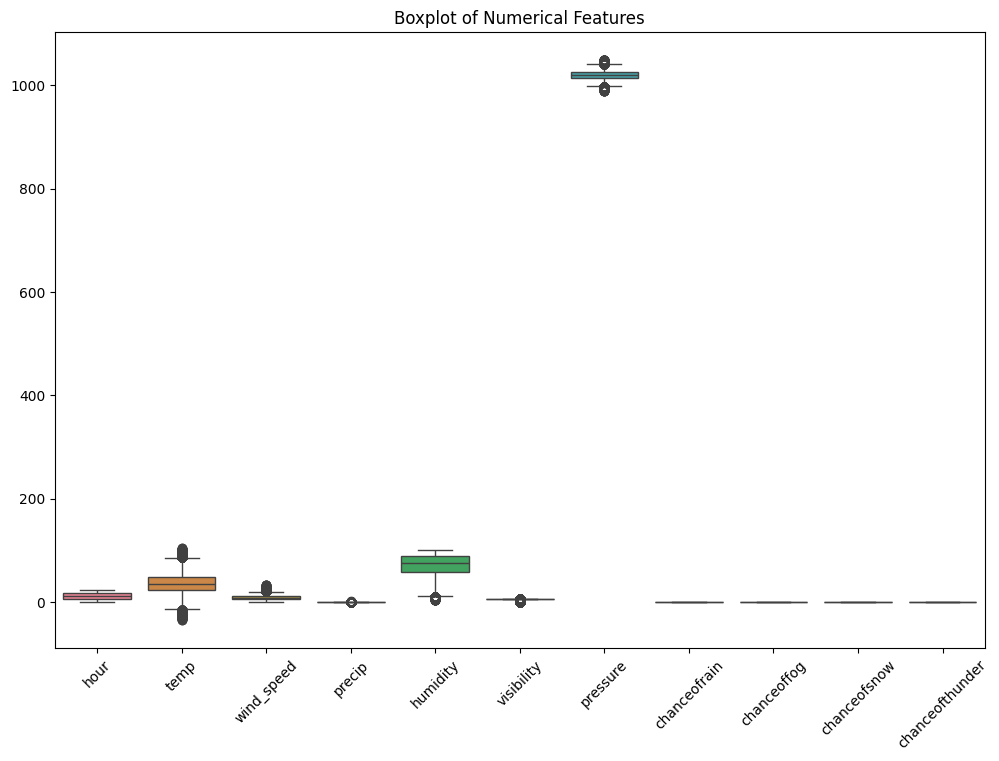

In [44]:
# Visualize outliers using boxplots:

# List of numerical features to include in the boxplot
numerical_features = ['hour','temp', 'wind_speed', 'precip', 'humidity', 'visibility', 'pressure',
                       'chanceofrain', 'chanceoffog', 'chanceofsnow', 'chanceofthunder']

# Create a boxplot for the numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=city_weather[numerical_features])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()



In [45]:

import pandas as pd

# List of numerical features
numerical_features = ['hour','temp', 'wind_speed', 'humidity', 'pressure']


# Do not remove outliers for precip and visibility --

# Define a dictionary to store outliers for each feature
outliers_dict = {}

for feature in numerical_features:
    Q1 = city_weather[feature].quantile(0.25)
    Q3 = city_weather[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = city_weather[(city_weather[feature] < (Q1 - 1.5 * IQR)) |
                            (city_weather[feature] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[feature] = outliers

# Display the number of outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Number of outliers in {feature}: {len(outliers)}")


Number of outliers in hour: 0
Number of outliers in temp: 1367
Number of outliers in wind_speed: 705
Number of outliers in humidity: 565
Number of outliers in pressure: 732


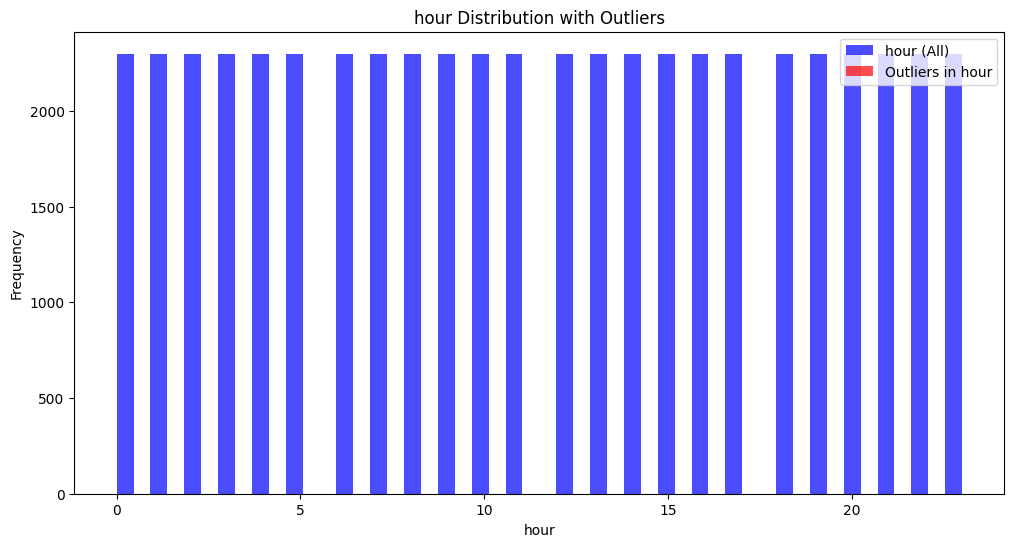

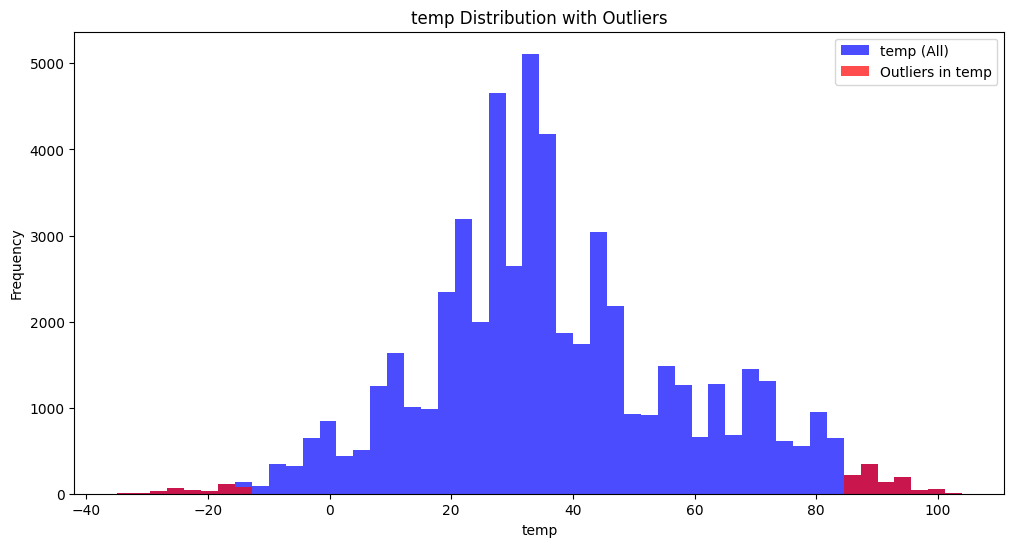

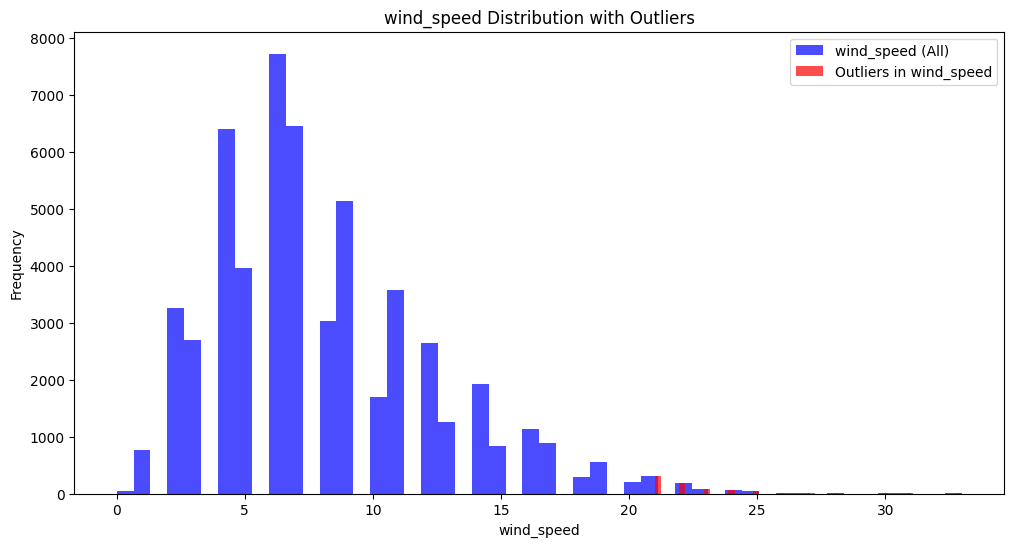

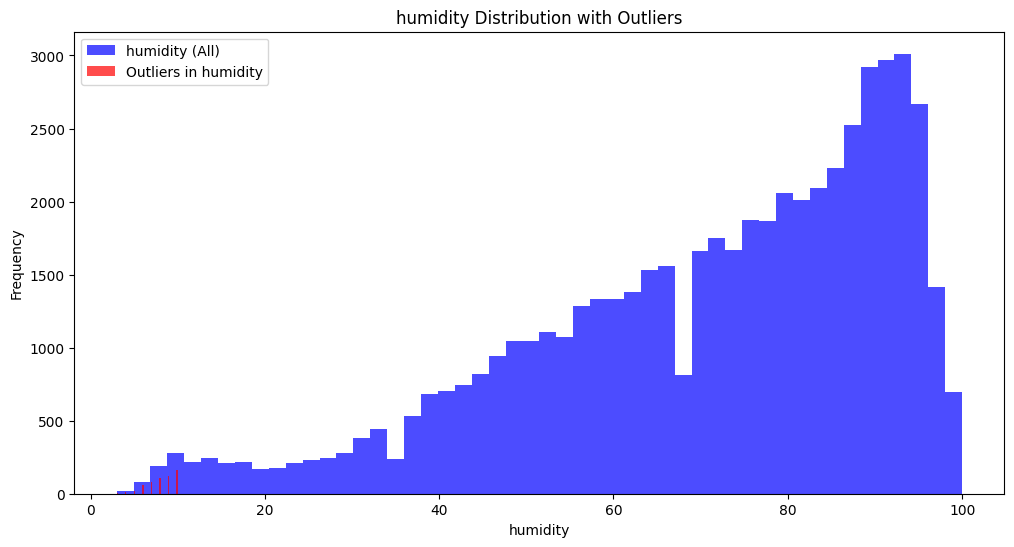

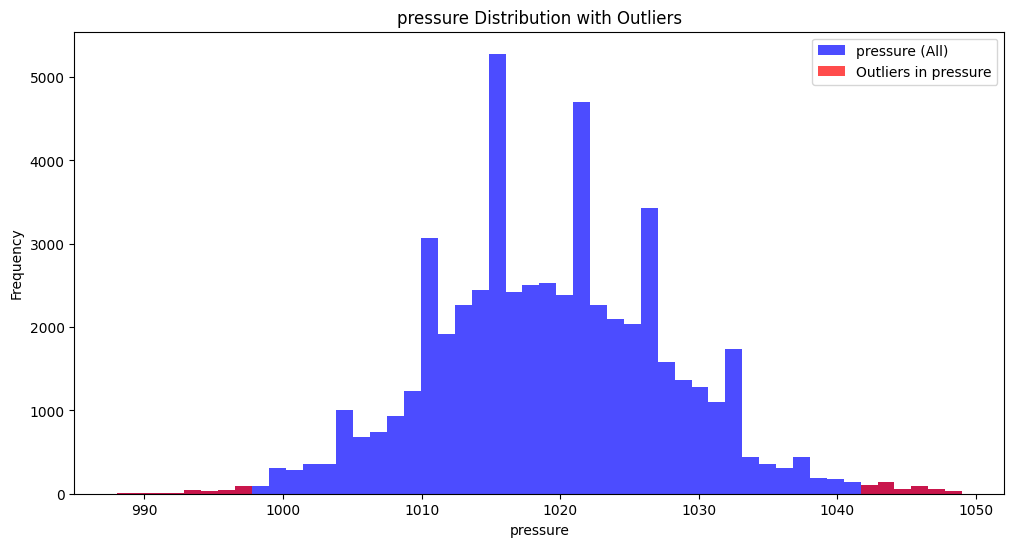

In [46]:

import matplotlib.pyplot as plt

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for the feature
    plt.hist(city_weather[feature], bins=50, color='blue', alpha=0.7, label=f'{feature} (All)')
    
    # Plot histogram for the outliers
    plt.hist(outliers_dict[feature][feature], bins=50, color='red', alpha=0.7, label=f'Outliers in {feature}')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution with Outliers')
    plt.legend()
    plt.show()


In [47]:

#remove outliers

import pandas as pd

# List of numerical features for which to remove outliers
numerical_features = ['hour', 'temp', 'wind_speed', 'humidity', 'pressure']

# Iterate through each numerical feature and remove outliers
for feature in numerical_features:
    Q1 = city_weather[feature].quantile(0.25)
    Q3 = city_weather[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for the feature
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers for this feature
    city_weather = city_weather[(city_weather[feature] >= lower_bound) & (city_weather[feature] <= upper_bound)]

# The DataFrame after outlier removal
print(city_weather)

# Check the shape to see how many rows remain
print(f"Number of rows after outlier removal: {city_weather.shape[0]}")


       index     id     city_id       date  hour  temp  wind_speed  \
0          1      1  C-927ceb5e 2019-01-01     0    30          11   
1          2      2  C-927ceb5e 2019-01-01     1    28          12   
2          3      3  C-927ceb5e 2019-01-01     2    28          13   
3          4      4  C-927ceb5e 2019-01-01     3    28          14   
4          5      5  C-927ceb5e 2019-01-01     4    28          13   
...      ...    ...         ...        ...   ...   ...         ...   
55171  55172  55172  C-594514f8 2019-02-15    19    23           3   
55172  55173  55173  C-594514f8 2019-02-15    20    23           3   
55173  55174  55174  C-594514f8 2019-02-15    21    23           3   
55174  55175  55175  C-594514f8 2019-02-15    22    23           2   
55175  55176  55176  C-594514f8 2019-02-15    23    23           2   

         description  precip  humidity  visibility  pressure  chanceofrain  \
0         Light snow     0.0        86           6      1019             0   
1  

hour feature was mapped to a standard range (0 to 23), so it doesn't have outliers in the categorical sense, as the values now fall within a defined range.

In [48]:
print(city_weather.dtypes)


index                       int64
id                          int64
city_id                    object
date               datetime64[ns]
hour                        int32
temp                        int64
wind_speed                  int64
description                object
precip                    float64
humidity                    int64
visibility                  int64
pressure                    int64
chanceofrain                int64
chanceoffog                 int64
chanceofsnow                int64
chanceofthunder             int64
date_time          datetime64[ns]
event_date         datetime64[ns]
dtype: object


In [49]:
city_weather.shape

(51834, 18)

In [50]:
# saving cleaned data for city_weather.csv
city_weather.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_city_weather.csv', index=False)


drivers

In [51]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password


# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to select data
 

query = 'SELECT * FROM drivers_table;'  


# Read data into a DataFrame
drivers = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
drivers.head()



,id,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,1,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,2,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,3,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,4,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,5,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65


In [52]:
drivers = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/drivers_table.csv')


In [53]:
drivers.head()


,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67
3,b2555587-8,Brendan Jacobs,male,44,10,proactive,2,69577118,59.82
4,b2e58421-d,Vincent Davis,male,41,10,proactive,7,28650047,62.65


In [54]:
drivers.info

<bound method DataFrame.info of        driver_id               name gender  age  experience driving_style  \
0     d9f30553-6       Daniel Marks   male   47           5     proactive   
1     82de7bb8-2      Clifford Carr   male   47          14     proactive   
2     7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3     b2555587-8     Brendan Jacobs   male   44          10     proactive   
4     b2e58421-d      Vincent Davis   male   41          10     proactive   
...          ...                ...    ...  ...         ...           ...   
1295  57f77e99-8     Robert Johnson   male   60          26     proactive   
1296  e64c4059-8  Patrick Hernandez   male   46          20     proactive   
1297  7e6a0cf5-1      Richard Ortiz   male   49          10  conservative   
1298  c4a966b0-b    Peter Rodriguez   male   49           5  conservative   
1299  e5d104b5-1   Michael Robinson   male   56          24     proactive   

      ratings  vehicle_no  average_speed_mp

In [55]:
drivers.shape

(1300, 9)

In [56]:
drivers.dtypes

driver_id             object
name                  object
gender                object
age                    int64
experience             int64
driving_style         object
ratings                int64
vehicle_no             int64
average_speed_mph    float64
dtype: object

In [57]:
drivers.describe()

,age,experience,ratings,vehicle_no,average_speed_mph
count,1300.000000,1300.000000,1300.000000,1.300000e+03,1300.000000
mean,47.814615,11.988462,5.633846,3.263242e+07,53.262854
std,4.973240,6.951765,2.137266,2.205390e+07,8.504282
min,28.000000,-8.000000,2.000000,1.000839e+07,29.150000
25%,45.000000,7.000000,4.000000,1.817244e+07,45.427500
50%,48.000000,11.000000,6.000000,2.584212e+07,57.340000
75%,51.000000,17.000000,8.000000,3.340052e+07,60.350000
max,65.000000,35.000000,9.000000,9.998167e+07,67.240000


In [58]:
drivers.isna().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

In [59]:
drivers.nunique()

driver_id            1300
name                 1274
gender                  2
age                    36
experience             41
driving_style           2
ratings                 8
vehicle_no           1300
average_speed_mph     978
dtype: int64

Find and handle Missing values

In [60]:
# Check for missing values
missing_values = drivers.isnull().sum()
print(missing_values)


driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64


In [61]:
# Drop rows with missing values in 'gender' and 'driving_style'
drivers = drivers.dropna(subset=['gender', 'driving_style'])

# Check the shape of the cleaned DataFrame
print(f"Shape of the cleaned DataFrame: {drivers.shape}")

# Verify that there are no more missing values
print(drivers.isnull().sum())


Shape of the cleaned DataFrame: (1226, 9)
driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64


Verify Missing Values After Imputation

In [62]:
# Check for missing values again
missing_values_after = drivers.isnull().sum()
print(missing_values_after)


driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64


Check for Duplicates - (bcoz, Duplicate rows can skew the analysis and models by over-representing certain data points).

In [63]:
# Check for duplicate rows
duplicates = drivers.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
drivers = drivers.drop_duplicates()


Number of duplicate rows: 0


Find and Handle Outliers - (bcoz,Outliers can affect the performance of the machine learning models or lead to misleading statistical conclusions.

Use statistical methods (like IQR or Z-score) or visualization methods (like boxplots) to identify outliers).

In [64]:


# List of numerical features
numerical_features = ['age', 'experience', 'ratings', 'average_speed_mph']

# Do not remove outliers for vehile_no - as it resembles truck Id and is unique

# Define a dictionary to store outliers for each feature
outliers_dict = {}

for feature in numerical_features:
    Q1 = drivers[feature].quantile(0.25)
    Q3 = drivers[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = drivers[(drivers[feature] < (Q1 - 1.5 * IQR)) |
                       (drivers[feature] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[feature] = outliers

# Display the number of outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Number of outliers in {feature} using IQR: {len(outliers)}")


Number of outliers in age using IQR: 16
Number of outliers in experience using IQR: 1
Number of outliers in ratings using IQR: 0
Number of outliers in average_speed_mph using IQR: 0


In [65]:
drivers.shape

(1226, 9)

In [66]:
# from scipy import stats
# # List of numerical features
# numerical_features = ['age', 'experience', 'ratings', 'average_speed_mph']

# # Define a dictionary to store outliers for each feature
# outliers_dict_z = {}

# # Threshold for Z-score
# threshold = 3

# for feature in numerical_features:
#     # Calculate Z-scores
#     z_scores = stats.zscore(drivers[feature].astype(float))  # Convert to float to ensure accurate Z-score calculation
    
#     # Find outliers
#     outliers = drivers[(abs(z_scores) > threshold)]
    
#     outliers_dict_z[feature] = outliers

# # Display the number of outliers for each feature
# for feature, outliers in outliers_dict_z.items():
#     print(f"Number of outliers in {feature} using Z-score: {len(outliers)}")


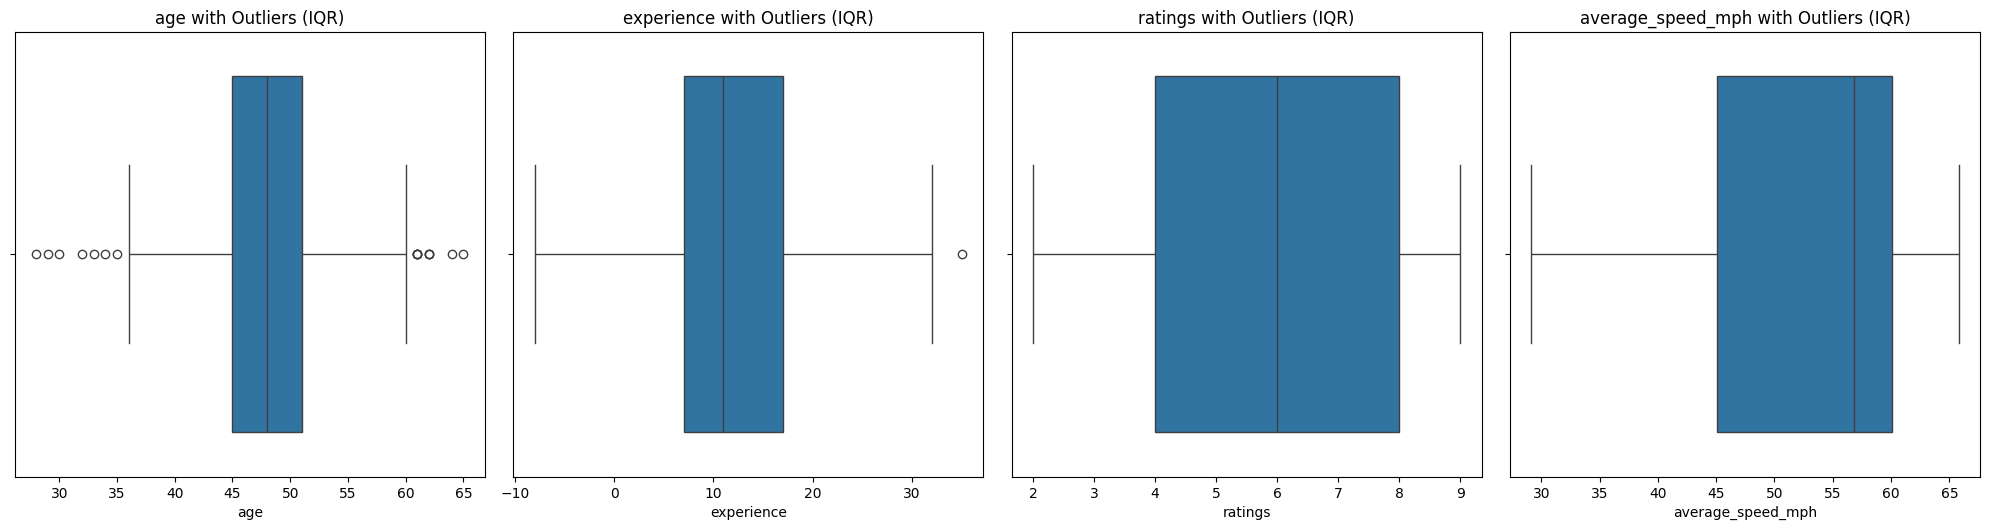

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['age', 'experience', 'ratings', 'average_speed_mph']

# Plot box plots for each numerical feature
plt.figure(figsize=(20, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features), i + 1)
    sns.boxplot(x=drivers[feature])
    plt.title(f'{feature} with Outliers (IQR)')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [68]:
#remove Outliers

import pandas as pd

# List of numerical features
numerical_features = ['age', 'experience', 'ratings', 'average_speed_mph']

# Iterate through each numerical feature and remove outliers
for feature in numerical_features:
    Q1 = drivers[feature].quantile(0.25)
    Q3 = drivers[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for the feature
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers for this feature
    drivers = drivers[(drivers[feature] >= lower_bound) & (drivers[feature] <= upper_bound)]

# The DataFrame after outlier removal
print(drivers)

# Check the shape to see how many rows remain
print(f"Number of rows after outlier removal: {drivers.shape[0]}")


       driver_id               name gender  age  experience driving_style  \
0     d9f30553-6       Daniel Marks   male   47           5     proactive   
1     82de7bb8-2      Clifford Carr   male   47          14     proactive   
2     7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3     b2555587-8     Brendan Jacobs   male   44          10     proactive   
4     b2e58421-d      Vincent Davis   male   41          10     proactive   
...          ...                ...    ...  ...         ...           ...   
1295  57f77e99-8     Robert Johnson   male   60          26     proactive   
1296  e64c4059-8  Patrick Hernandez   male   46          20     proactive   
1297  7e6a0cf5-1      Richard Ortiz   male   49          10  conservative   
1298  c4a966b0-b    Peter Rodriguez   male   49           5  conservative   
1299  e5d104b5-1   Michael Robinson   male   56          24     proactive   

      ratings  vehicle_no  average_speed_mph  
0           7    42302347   

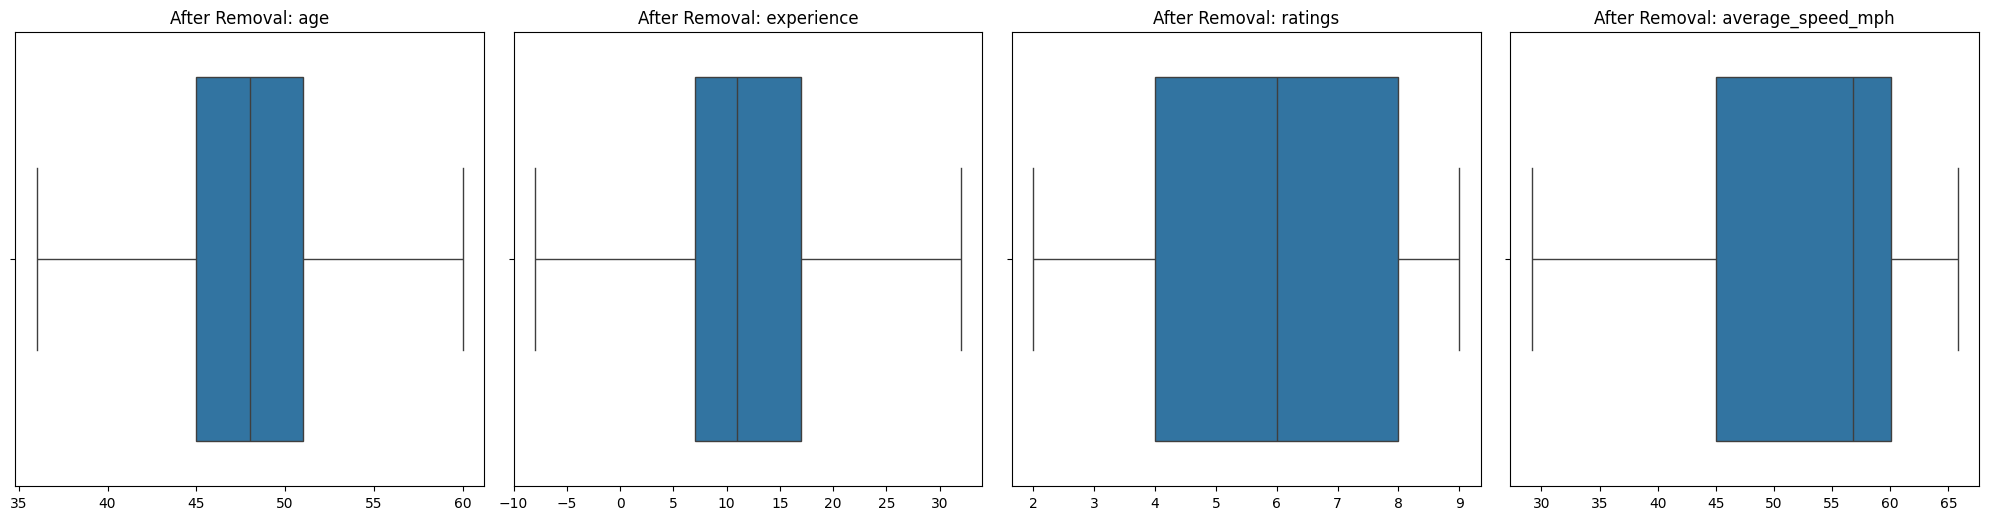

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for each feature after outlier removal
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features), i + 1 + len(numerical_features))
    sns.boxplot(x=drivers[feature])
    plt.title(f'After Removal: {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [203]:
drivers.dtypes

driver_id             object
name                  object
gender                object
age                    int64
experience             int64
driving_style         object
ratings                int64
vehicle_no             int64
average_speed_mph    float64
dtype: object

In [70]:
drivers.shape

(1209, 9)

Finding Outliers for Categorical features

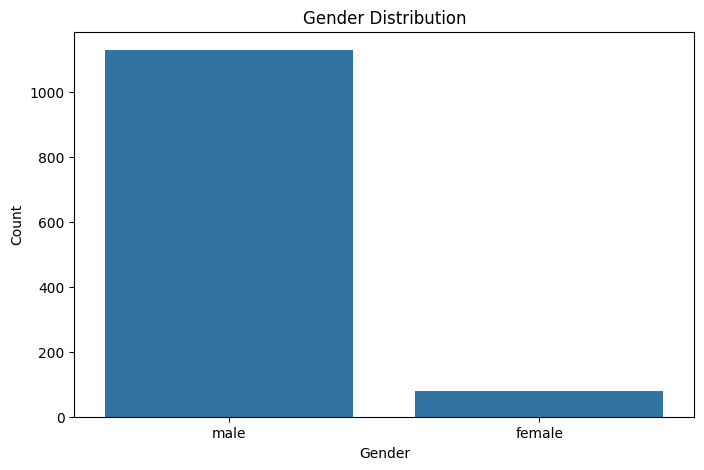

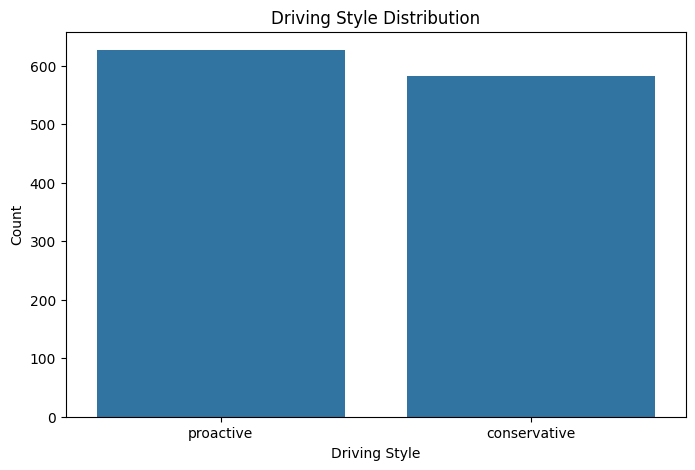

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'gender'
plt.figure(figsize=(8, 5))
sns.countplot(data=drivers, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Countplot for 'driving_style'
plt.figure(figsize=(8, 5))
sns.countplot(data=drivers, x='driving_style')
plt.title('Driving Style Distribution')
plt.xlabel('Driving Style')
plt.ylabel('Count')
plt.show()


In [72]:
print(drivers.isna().sum())


driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64


In [73]:
print(drivers.dtypes)


driver_id             object
name                  object
gender                object
age                    int64
experience             int64
driving_style         object
ratings                int64
vehicle_no             int64
average_speed_mph    float64
dtype: object


In [74]:
duplicates = drivers.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [75]:
# Create a new 'index' column starting from 1
drivers['index'] = drivers.index + 1

# Move the 'index' column to the front
drivers = drivers[['index'] + [col for col in drivers.columns if col != 'index']]



In [76]:
from datetime import datetime
import pandas as pd

# Adding event_date column with current date
today_date = datetime.now().strftime('%Y-%m-%d')
drivers['event_date'] = pd.to_datetime(today_date)
drivers_df = drivers 
# Print the DataFrame and its data types
print(drivers.head())
print(drivers.dtypes)


   index   driver_id               name gender  age  experience driving_style  \
0      1  d9f30553-6       Daniel Marks   male   47           5     proactive   
1      2  82de7bb8-2      Clifford Carr   male   47          14     proactive   
2      3  7e789842-4  Terry Faulkner MD   male   41           9  conservative   
3      4  b2555587-8     Brendan Jacobs   male   44          10     proactive   
4      5  b2e58421-d      Vincent Davis   male   41          10     proactive   

   ratings  vehicle_no  average_speed_mph event_date  
0        7    42302347              62.22 2024-10-15  
1        4    27867488              60.89 2024-10-15  
2        2    13927774              53.67 2024-10-15  
3        2    69577118              59.82 2024-10-15  
4        7    28650047              62.65 2024-10-15  
index                         int64
driver_id                    object
name                         object
gender                       object
age                           int64
exp

In [77]:
drivers.head()
print(drivers.dtypes) 

index                         int64
driver_id                    object
name                         object
gender                       object
age                           int64
experience                    int64
driving_style                object
ratings                       int64
vehicle_no                    int64
average_speed_mph           float64
event_date           datetime64[ns]
dtype: object


In [78]:
# saving cleaned data for drivers.csv
drivers.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_drivers.csv', index=False)


In [79]:
drivers.shape

(1209, 11)

In [80]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password


# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to select data
 

query = 'SELECT * FROM routes_table;'  


# Read data into a DataFrame
routes = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
routes.head()



,id,route_id,origin_id,destination_id,distance,average_hours
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [81]:
routes.head()


,id,route_id,origin_id,destination_id,distance,average_hours
0,1,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,2,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,3,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57
3,4,R-8d7a7fb2,C-927ceb5e,C-451776b7,1543.01,30.86
4,5,R-b236e347,C-927ceb5e,C-d80a1e7d,310.75,6.22


In [82]:
routes.shape

(2352, 6)

In [83]:
routes.dtypes

id                  int64
route_id           object
origin_id          object
destination_id     object
distance          float64
average_hours     float64
dtype: object

In [84]:
routes.describe()

,id,distance,average_hours
count,2352.000000,2352.000000,2352.000000
mean,1176.500000,2376.825230,47.536556
std,679.108239,2696.904248,53.938045
min,1.000000,3.900000,0.080000
25%,588.750000,557.365000,11.147500
50%,1176.500000,1104.825000,22.100000
75%,1764.250000,2516.407500,50.327500
max,2352.000000,10055.010000,201.100000


In [85]:
routes.isna().sum()

id                0
route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [86]:
routes.nunique()

id                2352
route_id          2352
origin_id           49
destination_id      49
distance          1174
average_hours     1080
dtype: int64

In [87]:
routes.shape

(2352, 6)

In [88]:
# Create a new 'index' column starting from 1
routes['index'] = routes.index + 1

# Move the 'index' column to the front
routes = routes[['index'] + [col for col in routes.columns if col != 'index']]

from datetime import datetime
import pandas as pd

# Adding event_date column with current date
today_date = datetime.now().strftime('%Y-%m-%d')
routes['event_date'] = pd.to_datetime(today_date)
routes_df = routes
# Print the DataFrame and its data types
print(routes.head())
print(routes.dtypes)


   index  id    route_id   origin_id destination_id  distance  average_hours  \
0      1   1  R-ada2a391  C-927ceb5e     C-56e39a5e   1735.06          34.70   
1      2   2  R-ae0ef31f  C-927ceb5e     C-73ae5412   1498.24          29.96   
2      3   3  R-4beec5fd  C-927ceb5e     C-4fe0fa24   6078.46         121.57   
3      4   4  R-8d7a7fb2  C-927ceb5e     C-451776b7   1543.01          30.86   
4      5   5  R-b236e347  C-927ceb5e     C-d80a1e7d    310.75           6.22   

  event_date  
0 2024-10-15  
1 2024-10-15  
2 2024-10-15  
3 2024-10-15  
4 2024-10-15  
index                      int64
id                         int64
route_id                  object
origin_id                 object
destination_id            object
distance                 float64
average_hours            float64
event_date        datetime64[ns]
dtype: object


In [89]:
# Check for missing values in each column
missing_values = routes.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
index             0
id                0
route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
event_date        0
dtype: int64


In [90]:
# Check for duplicate rows in the 'routes' DataFrame
duplicates = routes.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


# If you need to remove duplicates
routes = routes.drop_duplicates()


Number of duplicate rows: 0


In [91]:
routes.dtypes

index                      int64
id                         int64
route_id                  object
origin_id                 object
destination_id            object
distance                 float64
average_hours            float64
event_date        datetime64[ns]
dtype: object

In [92]:
import pandas as pd

# Sample DataFrame
# routes = pd.read_csv('path_to_your_routes_csv_file.csv') # Uncomment and set the correct path

# List of numerical features
numerical_features = ['distance', 'average_hours']

# Define a dictionary to store outliers for each feature
outliers_dict = {}

for feature in numerical_features:
    # Calculate Q1, Q3, and IQR
    Q1 = routes[feature].quantile(0.25)
    Q3 = routes[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = routes[(routes[feature] < (Q1 - 1.5 * IQR)) |
                      (routes[feature] > (Q3 + 1.5 * IQR))]
    
    # Store outliers in the dictionary
    outliers_dict[feature] = outliers

# Display the number of outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Number of outliers in {feature}: {len(outliers)}")
    # Display additional statistics if needed
    print()  # Print a blank line for readability


Number of outliers in distance: 456

Number of outliers in average_hours: 456



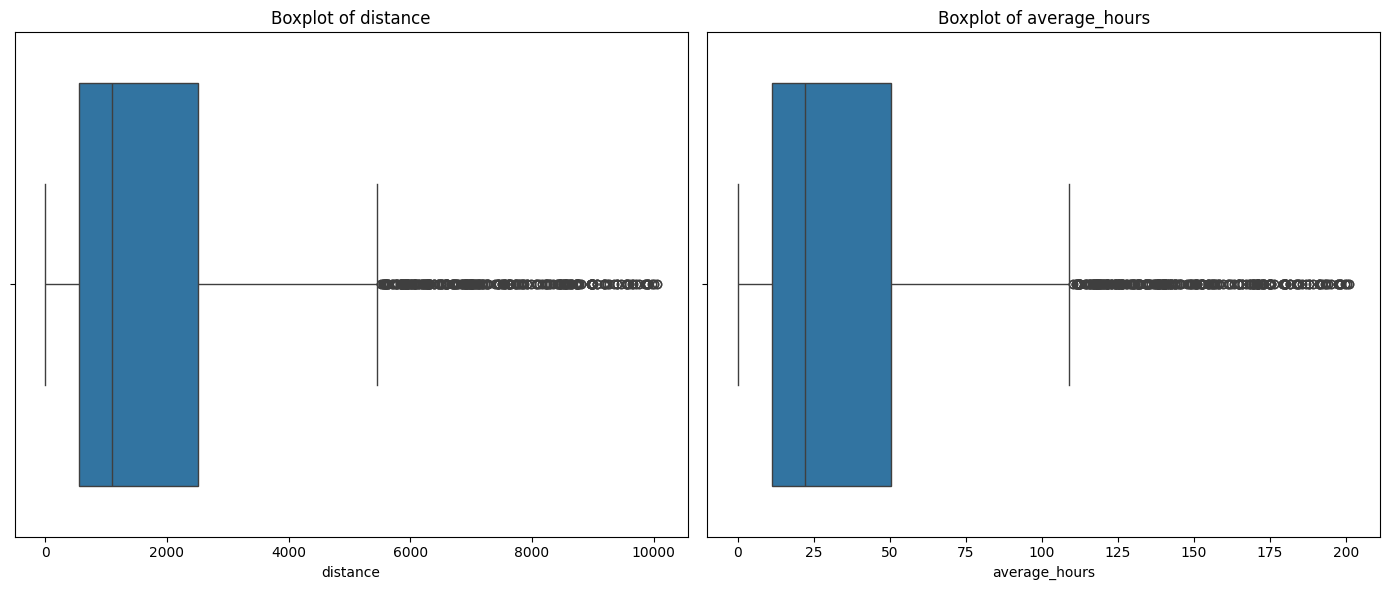

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
# routes = pd.read_csv('path_to_your_routes_csv_file.csv') # Uncomment and set the correct path

# List of numerical features
numerical_features = ['distance', 'average_hours']

# Create a figure with subplots
plt.figure(figsize=(14, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(x=routes[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()


In [94]:
import pandas as pd

# Sample DataFrame
# routes = pd.read_csv('path_to_your_routes_csv_file.csv')  # Uncomment and set the correct path

# List of numerical features
numerical_features = ['distance', 'average_hours']

for feature in numerical_features:
    # Calculate Q1, Q3, and IQR
    Q1 = routes[feature].quantile(0.25)
    Q3 = routes[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers for this feature
    routes = routes[(routes[feature] >= lower_bound) & (routes[feature] <= upper_bound)]

# Display the number of rows before and after outlier removal
print(f"Number of rows after outlier removal: {len(routes)}")


Number of rows after outlier removal: 1810


In [95]:
routes.dtypes

index                      int64
id                         int64
route_id                  object
origin_id                 object
destination_id            object
distance                 float64
average_hours            float64
event_date        datetime64[ns]
dtype: object

In [96]:
routes.shape

(1810, 8)

In [97]:
# saving cleaned data for city_weather.csv
routes.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_routes.csv', index=False)


routes_weather

In [102]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password


# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to select data
 

query = 'SELECT * FROM routes_weather;'  


# Read data into a DataFrame
routes_weather = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
routes_weather.head()



,id,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,1,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0
1,2,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0
2,3,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0
3,4,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0
4,5,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0


In [103]:
routes_weather.shape

(425712, 14)

In [100]:
#routes_weather = pd.read_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Training_data/routes_weather.csv')


In [104]:
routes_weather.shape

(425712, 14)

In [105]:
routes_weather.head()


,id,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,1,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0
1,2,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0
2,3,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0
3,4,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0
4,5,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0


In [106]:
routes_weather.dtypes

id                   int64
route_id            object
date                object
temp                 int64
wind_speed           int64
description         object
precip             float64
humidity             int64
visibility           int64
pressure             int64
chanceofrain         int64
chanceoffog          int64
chanceofsnow         int64
chanceofthunder      int64
dtype: object

In [107]:
routes_weather.describe()

,id,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
mean,212856.500000,57.518090,8.016063,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
std,122892.613236,19.919266,4.469639,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0
min,1.000000,-24.000000,0.000000,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,106428.750000,43.000000,5.000000,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,212856.500000,59.000000,7.000000,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,319284.250000,73.000000,11.000000,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,425712.000000,113.000000,35.000000,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0


In [108]:
routes_weather.isna().sum()

id                 0
route_id           0
date               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
dtype: int64

In [109]:
routes_weather.nunique()

id                 425712
route_id             2352
date                  181
temp                   77
wind_speed             36
description            48
precip                 13
humidity               98
visibility              7
pressure               66
chanceofrain            1
chanceoffog             1
chanceofsnow            1
chanceofthunder         1
dtype: int64

In [110]:
routes_weather.shape

(425712, 14)

In [111]:
# Create a new 'index' column starting from 1
routes_weather['index'] = routes_weather.index + 1

# Move the 'index' column to the front
routes_weather = routes_weather[['index'] + [col for col in routes_weather.columns if col != 'index']]

from datetime import datetime
import pandas as pd

# Adding event_date column with current date
today_date = datetime.now().strftime('%Y-%m-%d')
routes_weather['event_date'] = pd.to_datetime(today_date)
routes_weathers_df = routes_weather
# Print the DataFrame and its data types
print(routes_weather.head())
print(routes_weather.dtypes)


   index  id    route_id                 date  temp  wind_speed description  \
0      1   1  R-ada2a391  2019-01-01 00:00:00    30          11  Heavy snow   
1      2   2  R-ada2a391  2019-01-01 06:00:00    30          11  Heavy snow   
2      3   3  R-ada2a391  2019-01-02 00:00:00    28          11      Cloudy   
3      4   4  R-ada2a391  2019-01-02 06:00:00    27          11      Cloudy   
4      5   5  R-ada2a391  2019-01-03 00:00:00    27           9      Cloudy   

   precip  humidity  visibility  pressure  chanceofrain  chanceoffog  \
0     0.0        90           1      1010             0            0   
1     0.0        91           3      1012             0            0   
2     0.0        91           4      1013             0            0   
3     0.0        92           6      1015             0            0   
4     0.0        93           6      1016             0            0   

   chanceofsnow  chanceofthunder event_date  
0             0                0 2024-10-15  


In [112]:
# Check for missing values
missing_values = routes_weather.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
index              0
id                 0
route_id           0
date               0
temp               0
wind_speed         0
description        0
precip             0
humidity           0
visibility         0
pressure           0
chanceofrain       0
chanceoffog        0
chanceofsnow       0
chanceofthunder    0
event_date         0
dtype: int64


In [113]:
# Check for duplicate rows
duplicates = routes_weather.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
if duplicates > 0:
    routes_weather.drop_duplicates(inplace=True)
    print("Duplicates removed.")


Number of duplicate rows: 0


In [114]:
# Example of checking range for numeric features
print("Summary statistics:")
print(routes_weather.describe())


Summary statistics:
               index             id           temp     wind_speed  \
count  425712.000000  425712.000000  425712.000000  425712.000000   
mean   212856.500000  212856.500000      57.518090       8.016063   
min         1.000000       1.000000     -24.000000       0.000000   
25%    106428.750000  106428.750000      43.000000       5.000000   
50%    212856.500000  212856.500000      59.000000       7.000000   
75%    319284.250000  319284.250000      73.000000      11.000000   
max    425712.000000  425712.000000     113.000000      35.000000   
std    122892.613236  122892.613236      19.919266       4.469639   

              precip       humidity     visibility       pressure  \
count  425712.000000  425712.000000  425712.000000  425712.000000   
mean        0.005530      71.654482       5.378733    1015.541540   
min         0.000000       3.000000       0.000000     985.000000   
25%         0.000000      59.000000       6.000000    1011.000000   
50%         0

In [115]:
import pandas as pd

# Define a dictionary to store outliers for each feature
outliers_dict = {}

# List of numerical features to check for outliers
numerical_features = ['temp', 'wind_speed', 'humidity', 'pressure']

# Do not remove precip and visibility----

# Loop through numerical features
for feature in numerical_features:
    Q1 = routes_weather[feature].quantile(0.25)
    Q3 = routes_weather[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Find outliers
    outliers = routes_weather[(routes_weather[feature] < (Q1 - 1.5 * IQR)) |
                              (routes_weather[feature] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[feature] = outliers

# Display the number of outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Number of outliers in {feature}: {len(outliers)}")
    # Optionally display first few rows of outliers for inspection
    print(outliers.head())
    print()  # Print a blank line for readability


Number of outliers in temp: 1060
       index     id    route_id                 date  temp  wind_speed  \
21938  21939  21939  R-51e5c496  2019-01-04 06:00:00    -4           2   
21939  21940  21940  R-51e5c496  2019-01-05 00:00:00    -6           4   
21940  21941  21941  R-51e5c496  2019-01-05 06:00:00    -6           4   
21941  21942  21942  R-51e5c496  2019-01-06 00:00:00    -4           4   
21942  21943  21943  R-51e5c496  2019-01-06 06:00:00    -4           4   

                description  precip  humidity  visibility  pressure  \
21938     Patchy heavy snow     0.0        92           2      1026   
21939     Patchy heavy snow     0.0        90           3      1027   
21940     Patchy heavy snow     0.0        89           4      1028   
21941  Patchy snow possible     0.0        88           5      1029   
21942  Patchy snow possible     0.0        86           6      1030   

       chanceofrain  chanceoffog  chanceofsnow  chanceofthunder event_date  
21938             

In [116]:
#Remove Outliers

import pandas as pd

# List of numerical features to check for outliers (excluding 'precip' and 'visibility')
numerical_features = ['temp', 'wind_speed', 'humidity', 'pressure']

# Loop through numerical features and remove outliers
for feature in numerical_features:
    Q1 = routes_weather[feature].quantile(0.25)
    Q3 = routes_weather[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where feature values are outside the bounds
    routes_weather = routes_weather[
        (routes_weather[feature] >= lower_bound) &
        (routes_weather[feature] <= upper_bound)
    ]

# Display the number of rows after removing outliers
print(f"Number of rows after removing outliers: {len(routes_weather)}")

# Save or continue using the cleaned DataFrame
# routes_weather.to_csv('cleaned_routes_weather.csv', index=False)  # Uncomment to save to CSV


Number of rows after removing outliers: 396149


In [117]:
# Re-check for outliers
for feature in ['temp', 'wind_speed', 'humidity', 'pressure']:
    Q1 = routes_weather[feature].quantile(0.25)
    Q3 = routes_weather[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    remaining_outliers = routes_weather[(routes_weather[feature] < (Q1 - 1.5 * IQR)) |
                                        (routes_weather[feature] > (Q3 + 1.5 * IQR))]
    
    print(f"Number of remaining outliers in {feature}: {len(remaining_outliers)}")


Number of remaining outliers in temp: 839
Number of remaining outliers in wind_speed: 0
Number of remaining outliers in humidity: 4718
Number of remaining outliers in pressure: 0


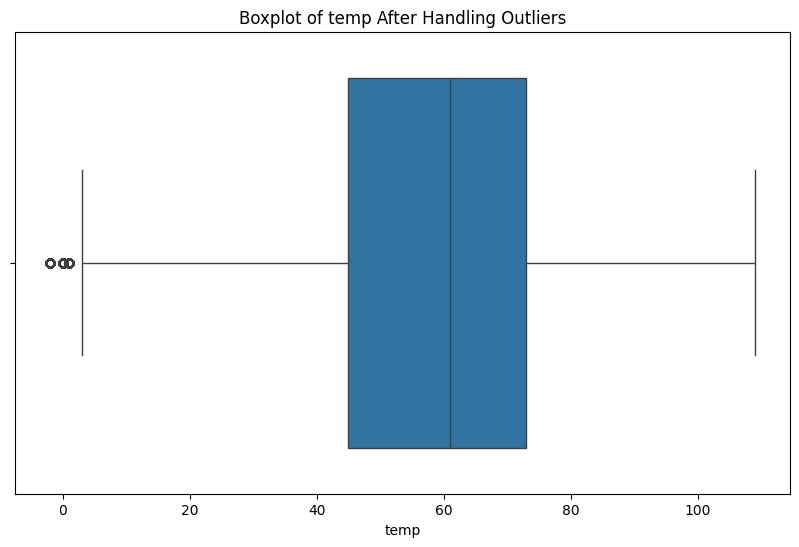

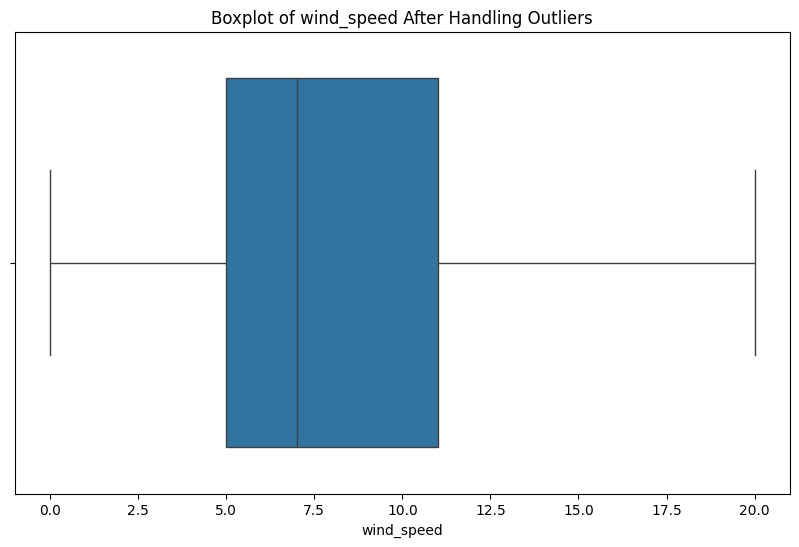

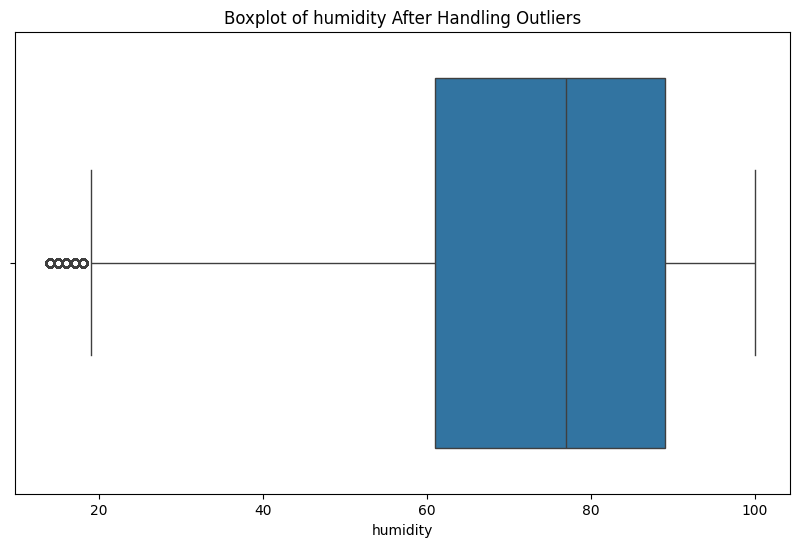

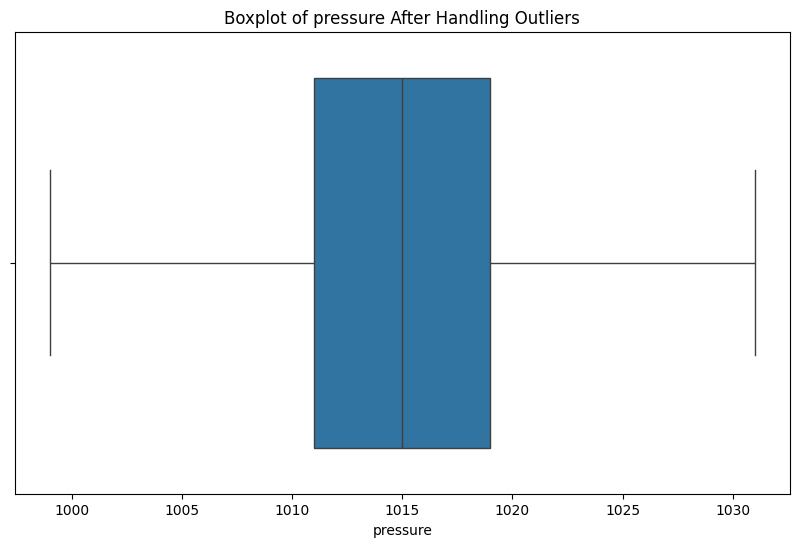

In [118]:
# Boxplots after handling outliers
for feature in ['temp', 'wind_speed', 'humidity', 'pressure']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=routes_weather[feature])
    plt.title(f'Boxplot of {feature} After Handling Outliers')
    plt.show()


In [119]:
routes_weather.shape

(396149, 16)

In [120]:
# saving cleaned data for routes_weather.csv
routes_weather.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_routes_weather.csv', index=False)


traffic

In [121]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password


# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to select data
 

query = 'SELECT * FROM traffic_table;'  


# Read data into a DataFrame
traffic = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
traffic.head()



,id,route_id,date,hour,no_of_vehicles,accident
0,1,R-ada2a391,2019-01-01,0,669.0,0
1,2,R-ada2a391,2019-01-01,100,628.0,0
2,3,R-ada2a391,2019-01-01,200,516.0,0
3,4,R-ada2a391,2019-01-01,300,582.0,0
4,5,R-ada2a391,2019-01-01,400,564.0,0


In [122]:
traffic.shape

(2597913, 6)

In [124]:
traffic.head()


,id,route_id,date,hour,no_of_vehicles,accident
0,1,R-ada2a391,2019-01-01,0,669.0,0
1,2,R-ada2a391,2019-01-01,100,628.0,0
2,3,R-ada2a391,2019-01-01,200,516.0,0
3,4,R-ada2a391,2019-01-01,300,582.0,0
4,5,R-ada2a391,2019-01-01,400,564.0,0


In [125]:
traffic.dtypes

id                  int64
route_id           object
date               object
hour                int64
no_of_vehicles    float64
accident            int64
dtype: object

In [126]:
traffic.describe()

,id,hour,no_of_vehicles,accident
count,2.597913e+06,2.597913e+06,2.596761e+06,2.597913e+06
mean,1.298957e+06,1.150021e+03,1.566776e+03,5.320848e-02
std,7.499530e+05,6.922211e+02,8.959424e+02,2.244490e-01
min,1.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.494790e+05,6.000000e+02,6.060000e+02,0.000000e+00
50%,1.298957e+06,1.200000e+03,1.969000e+03,0.000000e+00
75%,1.948435e+06,1.800000e+03,2.326000e+03,0.000000e+00
max,2.597913e+06,2.300000e+03,3.636000e+03,1.000000e+00


In [127]:
traffic.isna().sum()

id                   0
route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [128]:
traffic.nunique()

id                2597913
route_id             2352
date                   46
hour                   24
no_of_vehicles       2642
accident                2
dtype: int64

In [129]:
# Create a new 'index' column starting from 1
traffic['index'] = traffic.index + 1

# Move the 'index' column to the front
traffic = traffic[['index'] + [col for col in traffic.columns if col != 'index']]

from datetime import datetime
import pandas as pd

# Adding event_date column with current date
today_date = datetime.now().strftime('%Y-%m-%d')
traffic['event_date'] = pd.to_datetime(today_date)
traffic_df = traffic
# Print the DataFrame and its data types
print(traffic.head())
print(traffic.dtypes)


   index  id    route_id        date  hour  no_of_vehicles  accident  \
0      1   1  R-ada2a391  2019-01-01     0           669.0         0   
1      2   2  R-ada2a391  2019-01-01   100           628.0         0   
2      3   3  R-ada2a391  2019-01-01   200           516.0         0   
3      4   4  R-ada2a391  2019-01-01   300           582.0         0   
4      5   5  R-ada2a391  2019-01-01   400           564.0         0   

  event_date  
0 2024-10-15  
1 2024-10-15  
2 2024-10-15  
3 2024-10-15  
4 2024-10-15  
index                      int64
id                         int64
route_id                  object
date                      object
hour                       int64
no_of_vehicles           float64
accident                   int64
event_date        datetime64[ns]
dtype: object


In [130]:
traffic.dtypes

index                      int64
id                         int64
route_id                  object
date                      object
hour                       int64
no_of_vehicles           float64
accident                   int64
event_date        datetime64[ns]
dtype: object

In [131]:
traffic.info

<bound method DataFrame.info of            index       id    route_id        date  hour  no_of_vehicles  \
0              1        1  R-ada2a391  2019-01-01     0           669.0   
1              2        2  R-ada2a391  2019-01-01   100           628.0   
2              3        3  R-ada2a391  2019-01-01   200           516.0   
3              4        4  R-ada2a391  2019-01-01   300           582.0   
4              5        5  R-ada2a391  2019-01-01   400           564.0   
...          ...      ...         ...         ...   ...             ...   
2597908  2597909  2597909  R-38a366a9  2019-02-15  1900          2758.0   
2597909  2597910  2597910  R-38a366a9  2019-02-15  2000          1934.0   
2597910  2597911  2597911  R-38a366a9  2019-02-15  2100          1699.0   
2597911  2597912  2597912  R-38a366a9  2019-02-15  2200          2373.0   
2597912  2597913  2597913  R-38a366a9  2019-02-15  2300          2401.0   

         accident event_date  
0               0 2024-10-15  
1    

In [132]:
# Check for missing values
missing_values = traffic.isnull().sum()
missing_values


index                0
id                   0
route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
event_date           0
dtype: int64

In [133]:
# Drop rows with missing values in 'no_of_vehicles'
traffic = traffic.dropna(subset=['no_of_vehicles'])

# Check the shape of the cleaned DataFrame
print(f"Shape of the cleaned DataFrame: {traffic.shape}")

# Verify if there are any missing values left
missing_values_after = traffic.isnull().sum()
print(missing_values_after)


Shape of the cleaned DataFrame: (2596761, 8)
index             0
id                0
route_id          0
date              0
hour              0
no_of_vehicles    0
accident          0
event_date        0
dtype: int64


In [134]:

# Check if there are still missing values
print(traffic['no_of_vehicles'].isna().sum())  # Should be 0 if imputation was successful

0


In [135]:
# Check for missing values
missing_values = traffic.isnull().sum()
missing_values

index             0
id                0
route_id          0
date              0
hour              0
no_of_vehicles    0
accident          0
event_date        0
dtype: int64

In [136]:
# Check for duplicates
duplicates = traffic.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
traffic = traffic.drop_duplicates()


Number of duplicate rows: 0


In [137]:
traffic.dtypes

index                      int64
id                         int64
route_id                  object
date                      object
hour                       int64
no_of_vehicles           float64
accident                   int64
event_date        datetime64[ns]
dtype: object

In [138]:
# Convert the 'date' column to datetime
traffic['date'] = pd.to_datetime(traffic['date'], format='%Y-%m-%d')


In [139]:
traffic.dtypes

index                      int64
id                         int64
route_id                  object
date              datetime64[ns]
hour                       int64
no_of_vehicles           float64
accident                   int64
event_date        datetime64[ns]
dtype: object

In [140]:
traffic.head

<bound method NDFrame.head of            index       id    route_id       date  hour  no_of_vehicles  \
0              1        1  R-ada2a391 2019-01-01     0           669.0   
1              2        2  R-ada2a391 2019-01-01   100           628.0   
2              3        3  R-ada2a391 2019-01-01   200           516.0   
3              4        4  R-ada2a391 2019-01-01   300           582.0   
4              5        5  R-ada2a391 2019-01-01   400           564.0   
...          ...      ...         ...        ...   ...             ...   
2597908  2597909  2597909  R-38a366a9 2019-02-15  1900          2758.0   
2597909  2597910  2597910  R-38a366a9 2019-02-15  2000          1934.0   
2597910  2597911  2597911  R-38a366a9 2019-02-15  2100          1699.0   
2597911  2597912  2597912  R-38a366a9 2019-02-15  2200          2373.0   
2597912  2597913  2597913  R-38a366a9 2019-02-15  2300          2401.0   

         accident event_date  
0               0 2024-10-15  
1               0 2

In [141]:
# Function to identify outliers using IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns
numerical_columns = ['no_of_vehicles', 'accident']

# Identify and print outliers for numerical features
for col in numerical_columns:
    outliers = find_outliers_iqr(traffic, col)
    print(f"Outliers for {col}:")
    print(outliers)
    print("\n")


Outliers for no_of_vehicles:
Empty DataFrame
Columns: [index, id, route_id, date, hour, no_of_vehicles, accident, event_date]
Index: []


Outliers for accident:
           index       id    route_id       date  hour  no_of_vehicles  \
20            21       21  R-ada2a391 2019-01-01  2000          2546.0   
42            43       43  R-ada2a391 2019-01-02  1800          2483.0   
57            58       58  R-ada2a391 2019-01-03   900          2885.0   
58            59       59  R-ada2a391 2019-01-03  1000          3288.0   
89            90       90  R-ada2a391 2019-01-04  1700          2816.0   
...          ...      ...         ...        ...   ...             ...   
2597855  2597856  2597856  R-38a366a9 2019-02-13  1400          2741.0   
2597871  2597872  2597872  R-38a366a9 2019-02-14   600           948.0   
2597881  2597882  2597882  R-38a366a9 2019-02-14  1600          2750.0   
2597894  2597895  2597895  R-38a366a9 2019-02-15   500           465.0   
2597909  2597910  2597910

In [171]:
import pandas as pd

# Function to identify and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows that are outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to check for outliers
numerical_columns = ['no_of_vehicles', 'accident']  # Add your column names here

# Remove outliers for each column in numerical_columns
for col in numerical_columns:
    traffic = remove_outliers_iqr(traffic, col)

# Display the number of rows after removing outliers
print(f"Number of rows after removing outliers: {len(traffic)}")

# Save or continue working with the cleaned DataFrame
# traffic.to_csv('cleaned_traffic.csv', index=False)  # Uncomment to save to CSV


Number of rows after removing outliers: 2458582


In [172]:
traffic.dtypes

index                      int64
id                         int64
route_id                  object
date              datetime64[ns]
hour                       int64
no_of_vehicles           float64
accident                   int64
event_date        datetime64[ns]
dtype: object

In [173]:
traffic.shape

(2458582, 8)

In [174]:
# saving cleaned data for traffic.csv
traffic.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_traffic.csv', index=False)


trucks

In [175]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password


# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to select data
 

query = 'SELECT * FROM trucks_table;'  


# Read data into a DataFrame
trucks = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
trucks.head()



,id,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,1,42302347,10,3000.0,17,gas
1,2,27867488,14,10000.0,22,diesel
2,3,13927774,8,10000.0,19,gas
3,4,69577118,8,20000.0,19,gas
4,5,28650047,10,4000.0,21,diesel


In [176]:
trucks.shape


(1300, 6)

In [177]:
trucks.dtypes

id                        int64
truck_id                  int64
truck_age                 int64
load_capacity_pounds    float64
mileage_mpg               int64
fuel_type                object
dtype: object

In [178]:
trucks.describe()

,id,truck_id,truck_age,load_capacity_pounds,mileage_mpg
count,1300.000000,1.300000e+03,1300.000000,1243.000000,1300.000000
mean,650.500000,3.263242e+07,9.513077,8610.619469,20.784615
std,375.421985,2.205390e+07,2.039030,5583.759795,3.655876
min,1.000000,1.000839e+07,3.000000,3000.000000,11.000000
25%,325.750000,1.817244e+07,8.000000,4000.000000,18.000000
50%,650.500000,2.584212e+07,10.000000,6000.000000,21.000000
75%,975.250000,3.340052e+07,11.000000,15000.000000,24.000000
max,1300.000000,9.998167e+07,15.000000,20000.000000,29.000000


In [179]:
trucks.shape

(1300, 6)

In [180]:
trucks.isna().sum()

id                       0
truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [181]:
trucks.nunique()

id                      1300
truck_id                1300
truck_age                 13
load_capacity_pounds       6
mileage_mpg               19
fuel_type                  3
dtype: int64

In [182]:
trucks.info

<bound method DataFrame.info of         id  truck_id  truck_age  load_capacity_pounds  mileage_mpg fuel_type
0        1  42302347         10                3000.0           17       gas
1        2  27867488         14               10000.0           22    diesel
2        3  13927774          8               10000.0           19       gas
3        4  69577118          8               20000.0           19       gas
4        5  28650047         10                4000.0           21    diesel
...    ...       ...        ...                   ...          ...       ...
1295  1296  17792974         11                4000.0           22    diesel
1296  1297  17248432         11                6000.0           22    diesel
1297  1298  21865328         10                3000.0           15       gas
1298  1299  33564827         11               15000.0           24    diesel
1299  1300  34755903         12                4000.0           25    diesel

[1300 rows x 6 columns]>

In [183]:
trucks.dtypes

id                        int64
truck_id                  int64
truck_age                 int64
load_capacity_pounds    float64
mileage_mpg               int64
fuel_type                object
dtype: object

In [184]:
trucks.shape

(1300, 6)

In [185]:
# Create a new 'index' column starting from 1
trucks['index'] = trucks.index + 1

# Move the 'index' column to the front
trucks = trucks[['index'] + [col for col in trucks.columns if col != 'index']]



In [186]:
# Step 1: Check for missing values
missing_values = trucks.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 index                    0
id                       0
truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64


In [187]:
# Drop rows with missing values in 'load_capacity_pounds'
trucks = trucks.dropna(subset=['load_capacity_pounds'])

# Check the shape of the cleaned DataFrame
print(f"Shape of the cleaned DataFrame: {trucks.shape}")

# Verify that there are no more missing values
print(trucks.isnull().sum())


Shape of the cleaned DataFrame: (1243, 7)
index                   0
id                      0
truck_id                0
truck_age               0
load_capacity_pounds    0
mileage_mpg             0
fuel_type               0
dtype: int64


In [188]:
# Check for duplicates
duplicate_rows = trucks[trucks.duplicated()]
print(duplicate_rows)




Empty DataFrame
Columns: [index, id, truck_id, truck_age, load_capacity_pounds, mileage_mpg, fuel_type]
Index: []


In [189]:
# Remove duplicates if necessary
trucks.drop_duplicates()

,index,id,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,1,1,42302347,10,3000.0,17,gas
1,2,2,27867488,14,10000.0,22,diesel
2,3,3,13927774,8,10000.0,19,gas
3,4,4,69577118,8,20000.0,19,gas
4,5,5,28650047,10,4000.0,21,diesel
...,...,...,...,...,...,...,...
1295,1296,1296,17792974,11,4000.0,22,diesel
1296,1297,1297,17248432,11,6000.0,22,diesel
1297,1298,1298,21865328,10,3000.0,15,gas
1298,1299,1299,33564827,11,15000.0,24,diesel


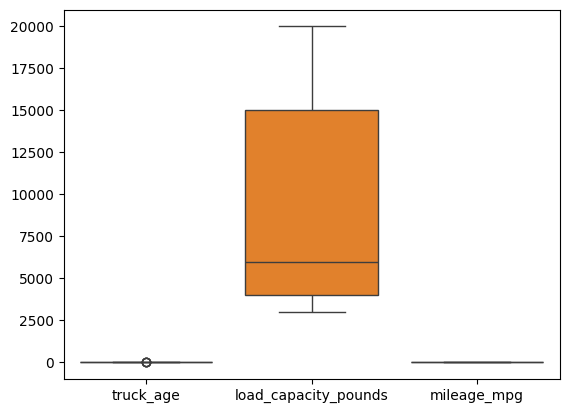

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for outlier detection
sns.boxplot(data=trucks[['truck_age', 'load_capacity_pounds', 'mileage_mpg']])
plt.show()


In [195]:
trucks.dtypes

index                     int64
id                        int64
truck_id                  int64
truck_age                 int64
load_capacity_pounds    float64
mileage_mpg               int64
fuel_type                object
dtype: object

In [196]:
# Function to identify outliers using IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns
numerical_columns = ['truck_age' ]

#do not remove outliers for 'load_capacity_pounds' , 'mileage_age'

# Identify and print outliers for numerical features
for col in numerical_columns:
    outliers = find_outliers_iqr(trucks, col)
    print(f"Outliers for {col}:")
    print(outliers)
    print("\n")


Outliers for truck_age:
     index   id  truck_id  truck_age  load_capacity_pounds  mileage_mpg  \
146    147  147  73014961          3               10000.0           18   
240    241  241  17036941          3                6000.0           23   
292    293  293  99568033          3               15000.0           17   
589    590  590  20516509          3                6000.0           23   

    fuel_type  
146       gas  
240    diesel  
292       gas  
589    diesel  




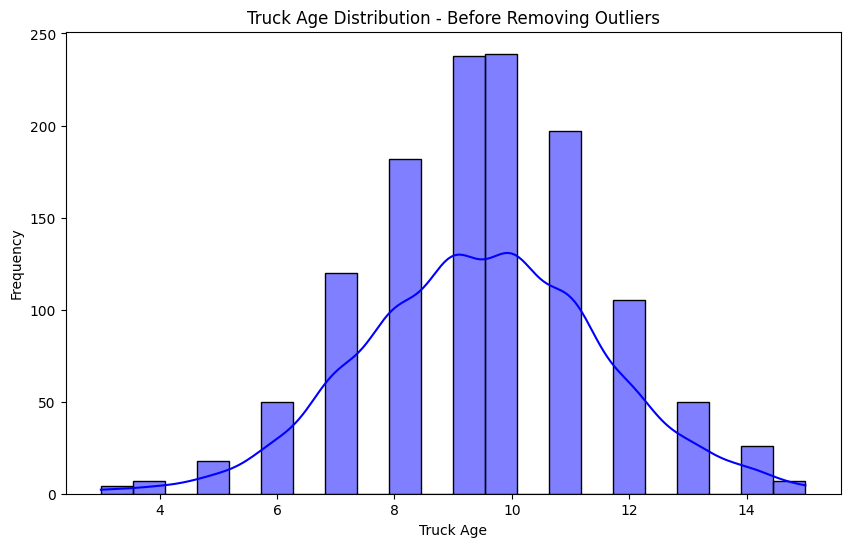

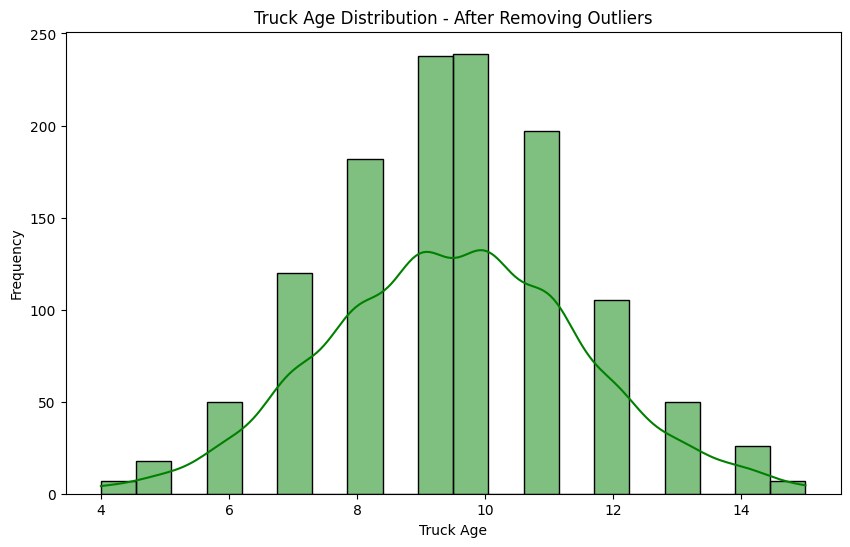

Number of rows before removing outliers: 1243
Number of rows after removing outliers: 1239


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to identify and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows that are outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Assuming trucks_before contains the original dataset
trucks_before = trucks.copy()  # Keep original data for comparison

# Visualize truck_age before removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(trucks_before['truck_age'], kde=True, color='blue')
plt.title('Truck Age Distribution - Before Removing Outliers')
plt.xlabel('Truck Age')
plt.ylabel('Frequency')
plt.show()

# Remove outliers for truck_age and keep it as trucks
trucks = remove_outliers_iqr(trucks, 'truck_age')

# Visualize truck_age after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(trucks['truck_age'], kde=True, color='green')
plt.title('Truck Age Distribution - After Removing Outliers')
plt.xlabel('Truck Age')
plt.ylabel('Frequency')
plt.show()

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(trucks_before)}")
print(f"Number of rows after removing outliers: {len(trucks)}")

# Optional: Save the cleaned dataset if needed
# trucks.to_csv('cleaned_trucks.csv', index=False)  # Uncomment to save to CSV


In [199]:
# Separate outliers and non-outliers
outliers_truck_age = trucks[trucks['truck_age'] == 3]
non_outliers_truck_age = trucks[trucks['truck_age'] > 3]

# Summary statistics for outliers
outliers_summary = outliers_truck_age.describe()
print("Summary statistics for truck age outliers (age = 3 years):")
print(outliers_summary)





Summary statistics for truck age outliers (age = 3 years):
       index   id  truck_id  truck_age  load_capacity_pounds  mileage_mpg
count    0.0  0.0       0.0        0.0                   0.0          0.0
mean     NaN  NaN       NaN        NaN                   NaN          NaN
std      NaN  NaN       NaN        NaN                   NaN          NaN
min      NaN  NaN       NaN        NaN                   NaN          NaN
25%      NaN  NaN       NaN        NaN                   NaN          NaN
50%      NaN  NaN       NaN        NaN                   NaN          NaN
75%      NaN  NaN       NaN        NaN                   NaN          NaN
max      NaN  NaN       NaN        NaN                   NaN          NaN


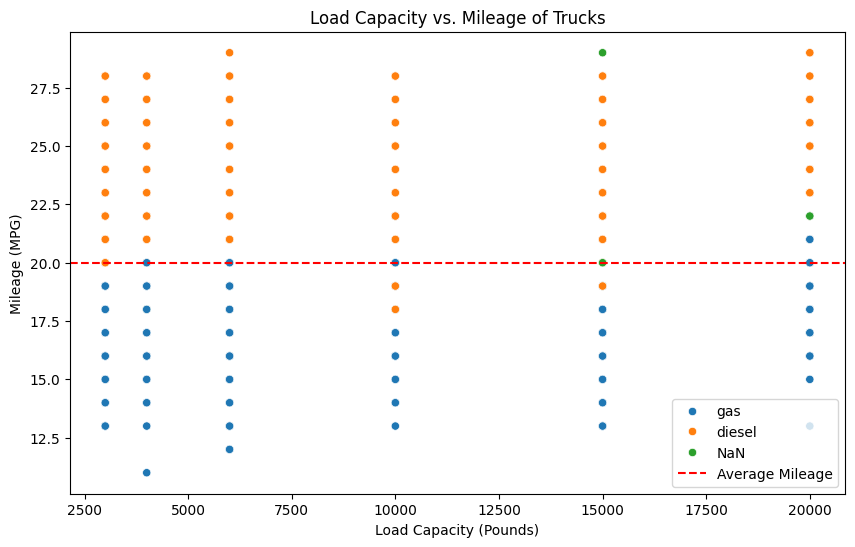

In [200]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='load_capacity_pounds', y='mileage_mpg', hue='fuel_type', data=trucks)
plt.axhline(y=20, color='r', linestyle='--', label='Average Mileage')
plt.title('Load Capacity vs. Mileage of Trucks')
plt.xlabel('Load Capacity (Pounds)')
plt.ylabel('Mileage (MPG)')
plt.legend()
plt.show()


In [201]:
trucks.dtypes

index                     int64
id                        int64
truck_id                  int64
truck_age                 int64
load_capacity_pounds    float64
mileage_mpg               int64
fuel_type                object
dtype: object

In [202]:
# Check the distribution of fuel_type
fuel_type_distribution = trucks['fuel_type'].value_counts()
print(fuel_type_distribution)


fuel_type
diesel    662
gas       539
NaN        38
Name: count, dtype: int64


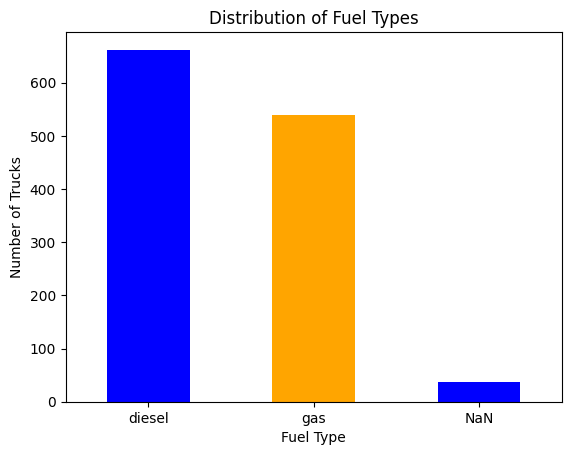

In [203]:
import matplotlib.pyplot as plt

# Plotting the distribution of fuel types
fuel_type_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Trucks')
plt.xticks(rotation=0)
plt.show()


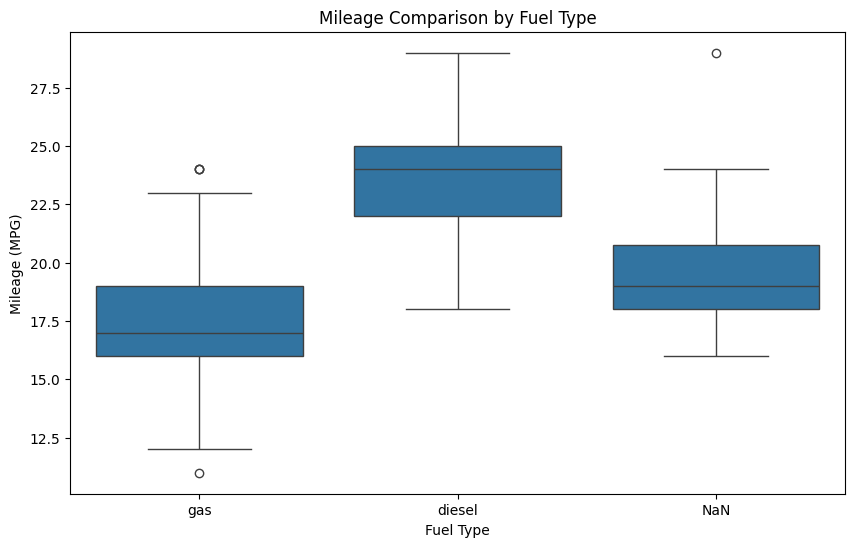

In [204]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='mileage_mpg', data=trucks)
plt.title('Mileage Comparison by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage (MPG)')
plt.show()


The correlation coefficients between numerical features are relatively low, indicating weak relationships.

For example, truck_age and mileage_mpg have a very small negative correlation of -0.027, suggesting that older trucks do not significantly correlate with higher or lower mileage.

load_capacity_pounds shows a weak positive correlation with mileage_mpg (0.009768), indicating no strong relationship.

In [205]:
from datetime import datetime

# Adding event_date column with current date
today_date = datetime.now().strftime('%Y-%m-%d')
trucks['event_date'] = pd.to_datetime(today_date)
trucks_df = trucks
# Print the DataFrame and its data types
print(trucks.head())

   index  id  truck_id  truck_age  load_capacity_pounds  mileage_mpg  \
0      1   1  42302347         10                3000.0           17   
1      2   2  27867488         14               10000.0           22   
2      3   3  13927774          8               10000.0           19   
3      4   4  69577118          8               20000.0           19   
4      5   5  28650047         10                4000.0           21   

  fuel_type event_date  
0       gas 2024-10-15  
1    diesel 2024-10-15  
2       gas 2024-10-15  
3       gas 2024-10-15  
4    diesel 2024-10-15  


In [207]:
# saving cleaned data for trucks.csv
trucks.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_trucks.csv', index=False)


In [206]:
trucks.shape

(1239, 8)

truck_schedule

In [209]:

# Database connection parameters
db_host = 'localhost'  # or the IP address of your Docker container
db_port = '5432'
db_name = 'truck_delay_classification'
db_user = 'postgres'
db_password = 'Anu0408'  # Change this if you set a different password


# Create a connection engine
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to select data
 

query = 'SELECT * FROM truck_schedule_table;'  


# Read data into a DataFrame
trucks_schedule = pd.read_sql_query(query, engine)

# Display the first few rows of the DataFrame
trucks_schedule.head()



,id,truck_id,route_id,departure_date,estimated_arrival,delay
0,1,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.000000000,0
1,2,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.000000000,0
2,3,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.000000000,0
3,4,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.000000000,0
4,5,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.999999999,0


In [210]:
query = 'SELECT * from truck_schedule_table;'

In [211]:
# Read data into a DataFrame
truck_schedule = pd.read_sql_query(query, engine)
truck_schedule

,id,truck_id,route_id,departure_date,estimated_arrival,delay
0,1,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.000000000,0
1,2,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.000000000,0
2,3,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.000000000,0
3,4,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.000000000,0
4,5,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.999999999,0
...,...,...,...,...,...,...
12303,12304,31047945,R-1484a7ea,2019-02-06 07:00:00,2019-02-13 22:40:12.000000000,0
12304,12305,14758432,R-927cf900,2019-02-06 07:00:00,2019-02-13 18:52:48.000000000,1
12305,12306,31370619,R-5a83ad98,2019-02-06 07:00:00,2019-02-14 08:01:48.000000000,1
12306,12307,67332883,R-991530bc,2019-02-06 07:00:00,2019-02-13 11:14:24.000000000,1


In [212]:
truck_schedule.shape

(12308, 6)

In [213]:
truck_schedule.head()

,id,truck_id,route_id,departure_date,estimated_arrival,delay
0,1,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.000000000,0
1,2,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.000000000,0
2,3,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.000000000,0
3,4,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.000000000,0
4,5,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.999999999,0


In [214]:
truck_schedule.dtypes

id                    int64
truck_id              int64
route_id             object
departure_date       object
estimated_arrival    object
delay                 int64
dtype: object

In [215]:
truck_schedule.describe()

,id,truck_id,delay
count,12308.000000,1.230800e+04,12308.000000
mean,6154.500000,3.291135e+07,0.348879
std,3553.157891,2.221287e+07,0.476635
min,1.000000,1.000839e+07,0.000000
25%,3077.750000,1.844361e+07,0.000000
50%,6154.500000,2.611401e+07,0.000000
75%,9231.250000,3.325027e+07,1.000000
max,12308.000000,9.998167e+07,1.000000


In [216]:
truck_schedule.isna().sum()

id                   0
truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64

In [217]:
truck_schedule.nunique()

id                   12308
truck_id              1249
route_id              2352
departure_date          26
estimated_arrival     8465
delay                    2
dtype: int64

In [218]:
truck_schedule.shape

(12308, 6)

In [219]:
#Check for Missing Values
missing_values = truck_schedule.isnull().sum()
print(missing_values)


id                   0
truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64


In [220]:
#Convert Data Types:
#Change departure_date and estimated_arrival to datetime format for better date handling.

truck_schedule['departure_date'] = pd.to_datetime(truck_schedule['departure_date'])
truck_schedule['estimated_arrival'] = pd.to_datetime(truck_schedule['estimated_arrival'])


In [221]:
#Check for Duplicates:

# Identify and remove any duplicate rows.
duplicates = truck_schedule.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
truck_schedule.drop_duplicates(inplace=True)


Number of duplicates: 0


count    12308.000000
mean         0.348879
std          0.476635
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: delay, dtype: float64


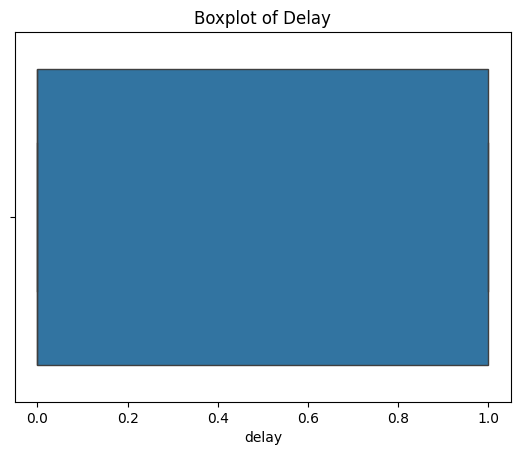

In [222]:
# Summary statistics for delay
print(truck_schedule['delay'].describe())

# Boxplot for visualizing outliers
sns.boxplot(x=truck_schedule['delay'])
plt.title('Boxplot of Delay')
plt.show()


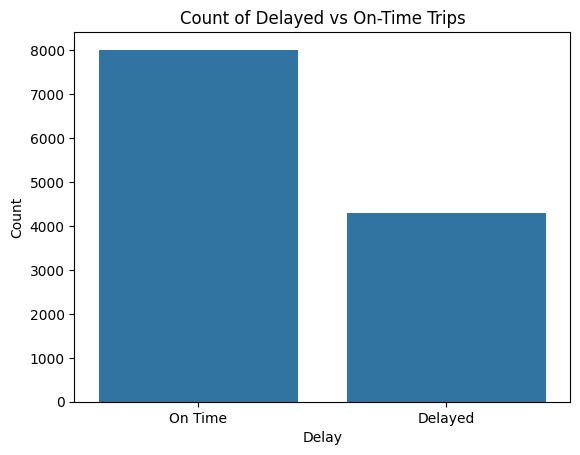

In [223]:
sns.countplot(x='delay', data=truck_schedule)
plt.title('Count of Delayed vs On-Time Trips')
plt.xlabel('Delay')
plt.ylabel('Count')
plt.xticks([0, 1], ['On Time', 'Delayed'])
plt.show()


In [224]:


from datetime import datetime

# Adding event_date column with current date
today_date = datetime.now().strftime('%Y-%m-%d')
truck_schedule['event_date'] = pd.to_datetime(today_date)
truck_schedule_df = truck_schedule
# Print the DataFrame and its data types
print(truck_schedule.head(5))


   id  truck_id    route_id      departure_date             estimated_arrival  \
0   1  30312694  R-b236e347 2019-01-01 07:00:00 2019-01-01 13:13:12.000000000   
1   2  59856374  R-29ea762e 2019-01-01 07:00:00 2019-01-02 04:01:12.000000000   
2   3  12602955  R-a3d67783 2019-01-01 07:00:00 2019-01-01 07:45:36.000000000   
3   4  46619422  R-31ec9310 2019-01-01 07:00:00 2019-01-01 20:46:48.000000000   
4   5  10140178  R-a07c5dbd 2019-01-01 07:00:00 2019-01-01 21:34:11.999999999   

   delay event_date  
0      0 2024-10-15  
1      0 2024-10-15  
2      0 2024-10-15  
3      0 2024-10-15  
4      0 2024-10-15  


In [225]:
truck_schedule['index'] = range(1, len(truck_schedule) + 1)
truck_schedule.head(5)


,id,truck_id,route_id,departure_date,estimated_arrival,delay,event_date,index
0,1,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.000000000,0,2024-10-15,1
1,2,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.000000000,0,2024-10-15,2
2,3,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.000000000,0,2024-10-15,3
3,4,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.000000000,0,2024-10-15,4
4,5,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.999999999,0,2024-10-15,5


In [226]:
truck_schedule.dtypes

id                            int64
truck_id                      int64
route_id                     object
departure_date       datetime64[ns]
estimated_arrival    datetime64[ns]
delay                         int64
event_date           datetime64[ns]
index                         int64
dtype: object

In [227]:
# saving cleaned data for truck_schedule.csv
truck_schedule.to_csv('C:/Users/anucv/OneDrive/Desktop/AI and ML training/Machine_Learning/TRUCK_DELAY_CLASSIFICATION_PROJECT/Data/Cleaned_data/cleaned_truck_schedule.csv', index=False)


In [228]:
truck_schedule.head(5)

,id,truck_id,route_id,departure_date,estimated_arrival,delay,event_date,index
0,1,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.000000000,0,2024-10-15,1
1,2,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.000000000,0,2024-10-15,2
2,3,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.000000000,0,2024-10-15,3
3,4,46619422,R-31ec9310,2019-01-01 07:00:00,2019-01-01 20:46:48.000000000,0,2024-10-15,4
4,5,10140178,R-a07c5dbd,2019-01-01 07:00:00,2019-01-01 21:34:11.999999999,0,2024-10-15,5


In [229]:
truck_schedule.shape

(12308, 8)

In [230]:



city_weather.shape #51000 - 52000

(51834, 18)

In [231]:
drivers.shape  # 1283

(1209, 11)

In [232]:
routes.shape #1810 -- check this again

(1810, 8)

In [233]:
routes_weather.shape     #396149

(396149, 16)

In [234]:
traffic.shape    # 2458584

(2458582, 8)

In [235]:
trucks.shape    #1296

(1239, 8)

In [236]:
truck_schedule.shape

(12308, 8)